<a href="https://colab.research.google.com/github/tranbuituanngoc/ML/blob/main/Lab_4_20130337_TranBuiTuanNgoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




In [2]:
from sklearn import datasets
data4 = datasets.load_iris()

In [3]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
classifier = LogisticRegression(random_state = 0) 
X= data4['data']
Y= data4['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7,  random_state = 1)
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print ("Precision : ", precision_score(y_test, y_pred, average='micro'))
print ("Recall : ", recall_score(y_test, y_pred, average='micro'))
print ("F1 : ", f1_score(y_test, y_pred, average='micro'))

Confusion Matrix : 
 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
Accuracy :  0.9777777777777777
Precision :  0.9777777777777777
Recall :  0.9777777777777777
F1 :  0.9777777777777777


#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



In [5]:
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()

In [6]:
classifier = LogisticRegression(random_state = 0) 
X1= mnist['data']
Y1= mnist['target']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.3, train_size=0.7,  random_state = 1)
classifier.fit(X_train1, y_train1) 
y_pred1 = classifier.predict(X_test1)
cm = confusion_matrix(y_test1, y_pred1)
print ("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print ("Precision : ", precision_score(y_test, y_pred, average='micro'))
print ("Recall : ", recall_score(y_test, y_pred, average='micro'))
print ("F1 : ", f1_score(y_test, y_pred, average='micro'))

Confusion Matrix : 
 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
Accuracy :  0.9777777777777777
Precision :  0.9777777777777777
Recall :  0.9777777777777777
F1 :  0.9777777777777777


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [7]:
from sklearn.neighbors import KNeighborsClassifier

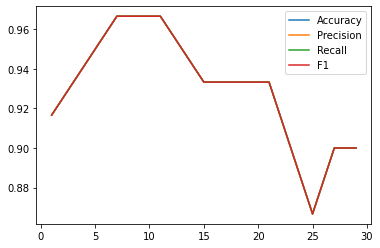

In [24]:
k_range= range(1,30,2)
accuracy=[]
precision=[]
recall=[]
f1=[]
for i in k_range:
  data4 = KNeighborsClassifier(n_neighbors=i)
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state = 0)
  data4.fit(X_train,y_train)
  y_pred = data4.predict(X_test) 
  accuracy.append( accuracy_score(y_test, y_pred))
  precision.append( precision_score(y_test, y_pred, average='micro'))
  recall.append( recall_score(y_test, y_pred, average='micro'))
  f1.append( f1_score(y_test, y_pred, average='micro'))
plt.plot(k_range,accuracy,label="Accuracy")
plt.plot(k_range,precision,label="Precision")
plt.plot(k_range,recall,label="Recall")
plt.plot(k_range,f1,label="F1")
plt.xlabel=("K")
plt.legend()


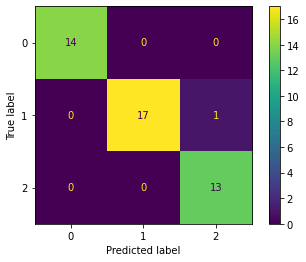

In [10]:
ConfusionMatrixDisplay.from_estimator(data4, X_test, y_test)

In [47]:
c1= [[0.97,  0.9778], [0.97, 0.9778], [0.97, 0.9778], [0.97, 0.9778]]
df = pd.DataFrame(c1, columns=['KNN', 'Logistic Regression'])
df

,KNN,Logistic Regression
0,0.97,0.9778
1,0.97,0.9778
2,0.97,0.9778
3,0.97,0.9778


#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


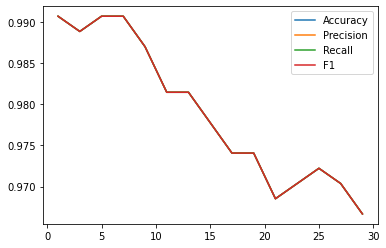

In [17]:
k_range= range(1,30,2)
accuracy1=[]
precision1=[]
recall1=[]
f11=[]
for i in k_range:
  mnist = KNeighborsClassifier(n_neighbors=i)
  X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.3, train_size=0.7,  random_state = 1)
  mnist.fit(X_train1,y_train1)
  y_pred1 = mnist.predict(X_test1) 
  accuracy1.append( accuracy_score(y_test1, y_pred1))
  precision1.append( precision_score(y_test1, y_pred1, average='micro'))
  recall1.append( recall_score(y_test1, y_pred1, average='micro'))
  f11.append( f1_score(y_test1, y_pred1, average='micro'))
plt.plot(k_range,accuracy1,label="Accuracy")
plt.plot(k_range,precision1,label="Precision")
plt.plot(k_range,recall1,label="Recall")
plt.plot(k_range,f11,label="F1")
plt.xlabel=("K")
plt.legend()

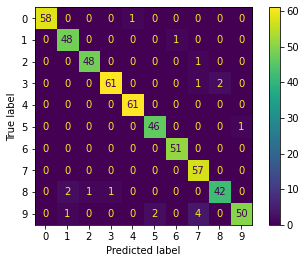

In [19]:
ConfusionMatrixDisplay.from_estimator(mnist, X_test1, y_test1)

In [48]:
c2= [[0.992,  0.9778], [0.992, 0.9778], [0.992, 0.9778], [0.992, 0.9778]]
df = pd.DataFrame(c2, columns=['KNN', 'Logistic Regression'])
df

,KNN,Logistic Regression
0,0.992,0.9778
1,0.992,0.9778
2,0.992,0.9778
3,0.992,0.9778


#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [40]:
data=pd.read_csv('spambase.csv')

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix : 
 [[803  38]
 [ 65 475]]
Accuracy :  0.9254163649529327
Precision :  0.9254163649529327
Recall :  0.9254163649529327
F1 :  0.9254163649529327


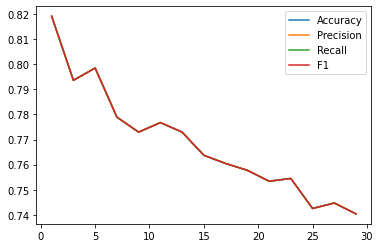

In [42]:
classifier = LogisticRegression(random_state = 0) 
X2= data[['word_freq_000', 'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive',
  'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business',
  'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_money', 'word_freq_hp',
  'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
  'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
  'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
  'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21',
  'char_freq_%24', 'char_freq_%23', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']]
Y2= data['class']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.3, train_size=0.7,  random_state = 1)
classifier.fit(X_train2, y_train2) 
y_pred2 = classifier.predict(X_test2)
cm = confusion_matrix(y_test2, y_pred2)
print ("Confusion Matrix : \n", confusion_matrix(y_test2, y_pred2))
print ("Accuracy : ", accuracy_score(y_test2, y_pred2))
print ("Precision : ", precision_score(y_test2, y_pred2, average='micro'))
print ("Recall : ", recall_score(y_test2, y_pred2, average='micro'))
print ("F1 : ", f1_score(y_test2, y_pred2, average='micro'))
k_range= range(1,30,2)
accuracy2=[]
precision2=[]
recall2=[]
f12=[]
for i in k_range:
  data = KNeighborsClassifier(n_neighbors=i)
  X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.4,  random_state = 0)
  data.fit(X_train2,y_train2)
  y_pred2 = data.predict(X_test2) 
  accuracy2.append( accuracy_score(y_test2, y_pred2))
  precision2.append( precision_score(y_test2, y_pred2, average='micro'))
  recall2.append( recall_score(y_test2, y_pred2, average='micro'))
  f12.append( f1_score(y_test2, y_pred2, average='micro'))
plt.plot(k_range,accuracy2,label="Accuracy")
plt.plot(k_range,precision2,label="Precision")
plt.plot(k_range,recall2,label="Recall")
plt.plot(k_range,f12,label="F1")
plt.xlabel=("K")
plt.legend()

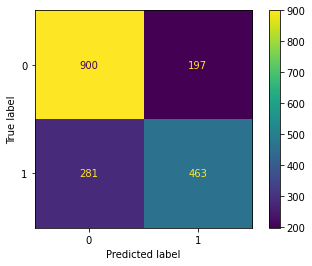

In [44]:
ConfusionMatrixDisplay.from_estimator(data, X_test2, y_test2)

In [30]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

[Text(0.8729126865635158, 0.9857142857142858, 'x[52] <= 0.056\ngini = 0.478\nsamples = 4601\nvalue = [2788, 1813]'),
 Text(0.7734983728315284, 0.9571428571428572, 'x[7] <= 0.055\ngini = 0.36\nsamples = 3471\nvalue = [2655, 816]'),
 Text(0.6510138500799597, 0.9285714285714286, 'x[51] <= 0.378\ngini = 0.275\nsamples = 3141\nvalue = [2625, 516]'),
 Text(0.5406551749986963, 0.9, 'x[16] <= 0.2\ngini = 0.181\nsamples = 2737\nvalue = [2462, 275]'),
 Text(0.4550349063081229, 0.8714285714285714, 'x[23] <= 0.01\ngini = 0.135\nsamples = 2507\nvalue = [2325, 182]'),
 Text(0.4162493046984999, 0.8428571428571429, 'x[22] <= 0.155\ngini = 0.111\nsamples = 2439\nvalue = [2295, 144]'),
 Text(0.37872746788576195, 0.8142857142857143, 'x[55] <= 416.0\ngini = 0.101\nsamples = 2404\nvalue = [2276, 128]'),
 Text(0.37427753828503885, 0.7857142857142857, 'x[5] <= 0.715\ngini = 0.097\nsamples = 2399\nvalue = [2276, 123]'),
 Text(0.31703358306245544, 0.7571428571428571, 'x[27] <= 7.105\ngini = 0.079\nsamples = 21

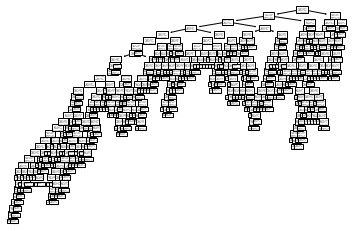

In [32]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X2, Y2)
tree.plot_tree(dtree)

In [46]:
c3= [[0.82,  0.9254163649529327], [0.82, 0.9254163649529327], [0.82, 0.9254163649529327], [0.82, 0.9254163649529327]]
df = pd.DataFrame(c3, columns=['KNN', 'Logistic Regression'])
df

,KNN,Logistic Regression
0,0.82,0.925416
1,0.82,0.925416
2,0.82,0.925416
3,0.82,0.925416


#Finally,
Save a copy in your Github. Remember renaming the notebook.